In [1]:
from openGaze import openGaze
from openGazeData import openGazeData
import torch 
from glob import glob
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
model = openGaze("../ProDataset", "../Result")

dev = torch.device('cpu')

weights = torch.load("../Result/lightning_logs/version_5/checkpoints/epoch=9-step=18790.ckpt", map_location=dev)['state_dict']

model.load_state_dict(weights)
model.to(dev)
model.eval()

Data Path:  ../ProDataset


openGaze(
  (eyeModel): eyeModel(
    (model): Sequential(
      (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
      (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (4): Dropout(p=0.02, inplace=False)
      (5): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2))
      (6): BatchNorm2d(64, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (7): LeakyReLU(negative_slope=0.01, inplace=True)
      (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (9): Dropout(p=0.02, inplace=False)
      (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (12): LeakyReLU(negative_slope=0.01, inplace=True)
      (13): AvgPool2d(kernel_size=2, stride=2, padding=0)
      (14): Dropout(p=0.02, inplace=False)
    )
  )
  (l

In [5]:
def euc(a, b):
    return np.sqrt(np.sum(np.square(a - b), axis=1))

In [6]:
file_root = "..//ProDataset//test//images//"
test_dataset = openGazeData(file_root, phase='test')
test_dataloader = DataLoader(test_dataset, batch_size=256, num_workers=8, pin_memory=False, shuffle=False,persistent_workers=True)

Root =  ..//ProDataset//test//images//*.jpg
66054
Num Files for test = 66054


In [15]:


preds, gt = [], []
for j in tqdm(test_dataloader):
    leye, reye, kps, target = j[1].to(dev), j[2].to(dev), j[3].to(dev), j[4].to(dev)
    
    with torch.no_grad():
        pred = model(leye, reye, kps)
    pred = pred.cpu().detach().numpy()
    preds.extend(pred)  
    
    gt.extend(target.cpu().detach().numpy())
    
preds = np.array(preds)
pts = np.unique(gt, axis=0)

gt = np.array(gt)
dist = euc(preds, gt)
for i in range(len(preds)):
    print("For {} gt is {}".format(preds[i],gt[i]))
print("Mean Euclidean Distance: ", dist.mean())





100%|██████████| 259/259 [14:31<00:00,  3.37s/it]


For [  0.34232187 -10.173292  ] gt is [-5.906607  -2.8517249]
For [ 7.686138e-03 -7.760050e+00] gt is [-5.906607  -2.8517249]
For [-0.6677494 -5.061063 ] gt is [-5.906607  -2.8517249]
For [-1.831356 -4.510603] gt is [-5.906607  -2.8517249]
For [-3.4521828 -8.440611 ] gt is [ -5.6459618 -10.641919 ]
For [-3.0912924 -8.5491085] gt is [ -5.6459618 -10.641919 ]
For [-3.6317368 -8.986237 ] gt is [ -5.6459618 -10.641919 ]
For [-1.1713934 -8.751881 ] gt is [ -5.6459618 -10.641919 ]
For [ 2.4921274 -7.6460195] gt is [ 3.4419634 -6.211449 ]
For [ 2.172393 -5.825416] gt is [ 3.4419634 -6.211449 ]
For [ 2.6316478 -6.2867584] gt is [ 3.4419634 -6.211449 ]
For [ 2.0235493 -6.3336215] gt is [ 3.4419634 -6.211449 ]
For [ 2.2685199 -6.034545 ] gt is [ 3.4419634 -6.211449 ]
For [ 0.34979677 -8.599945  ] gt is [-5.00000e-04 -1.08925e+01]
For [ 1.6095066 -8.928823 ] gt is [-5.00000e-04 -1.08925e+01]
For [ 0.6616745 -9.339453 ] gt is [-5.00000e-04 -1.08925e+01]
For [  0.28595638 -10.199717  ] gt is [-5.00

In [8]:
all_files = glob(file_root+"*.jpg")
all_files = [i[:-10] for i in all_files]
files = np.unique(all_files)
print("Found ", len(all_files), " images ",len(files), "People")

Found  66054  images  151 People


In [9]:
total_test = {}

for id in tqdm(range(len(files))):
    preds, gt = [], []
    f = files[id]
    print(f)
    
    test_data = openGazeData(f, phase='test')
    test_loader = DataLoader(test_data,batch_size=30, num_workers=7, persistent_workers=True,)
    for j in tqdm(test_loader):
        leye, reye, kps, target = j[1].to(dev), j[2].to(dev), j[3].to(dev), j[4].to(dev)

        with torch.no_grad():
            pred = model(leye, reye, kps)
        pred = pred.cpu().detach().numpy()
        preds.extend(pred)  

        gt.extend(target.cpu().detach().numpy())

    preds = np.array(preds)
    pts = np.unique(gt, axis=0)

    gt = np.array(gt)
    dist = euc(preds, gt)
    total_test[id] = [dist, gt, preds, pts]

  0%|                                                                                                                                             | 0/151 [00:00<?, ?it/s]

..//ProDataset//test//images\00010_
Root =  ..//ProDataset//test//images\00010_*.jpg
502
Num Files for test = 502



  1%|▉                                                                                                                                    | 1/151 [00:22<57:01, 22.81s/it]

..//ProDataset//test//images\00097_
Root =  ..//ProDataset//test//images\00097_*.jpg
11
Num Files for test = 11



  1%|█▊                                                                                                                                   | 2/151 [00:39<47:06, 18.97s/it]

..//ProDataset//test//images\00110_
Root =  ..//ProDataset//test//images\00110_*.jpg
230
Num Files for test = 230



  2%|██▋                                                                                                                                  | 3/151 [01:03<53:07, 21.54s/it]

..//ProDataset//test//images\00126_
Root =  ..//ProDataset//test//images\00126_*.jpg
441
Num Files for test = 441



  3%|███▌                                                                                                                                 | 4/151 [01:25<53:31, 21.84s/it]

..//ProDataset//test//images\00178_
Root =  ..//ProDataset//test//images\00178_*.jpg
244
Num Files for test = 244



  3%|████▍                                                                                                                                | 5/151 [01:43<48:59, 20.13s/it]

..//ProDataset//test//images\00190_
Root =  ..//ProDataset//test//images\00190_*.jpg
168
Num Files for test = 168



  4%|█████▎                                                                                                                               | 6/151 [01:59<45:27, 18.81s/it]

..//ProDataset//test//images\00192_
Root =  ..//ProDataset//test//images\00192_*.jpg
464
Num Files for test = 464



  5%|██████▏                                                                                                                              | 7/151 [02:17<44:55, 18.72s/it]

..//ProDataset//test//images\00220_
Root =  ..//ProDataset//test//images\00220_*.jpg
224
Num Files for test = 224



  5%|███████                                                                                                                              | 8/151 [02:33<42:19, 17.76s/it]

..//ProDataset//test//images\00222_
Root =  ..//ProDataset//test//images\00222_*.jpg
427
Num Files for test = 427



  6%|███████▉                                                                                                                             | 9/151 [02:50<41:26, 17.51s/it]

..//ProDataset//test//images\00233_
Root =  ..//ProDataset//test//images\00233_*.jpg
69
Num Files for test = 69



  7%|████████▋                                                                                                                           | 10/151 [03:04<38:52, 16.54s/it]

..//ProDataset//test//images\00319_
Root =  ..//ProDataset//test//images\00319_*.jpg
402
Num Files for test = 402



  7%|█████████▌                                                                                                                          | 11/151 [03:22<39:17, 16.84s/it]

..//ProDataset//test//images\00330_
Root =  ..//ProDataset//test//images\00330_*.jpg
398
Num Files for test = 398



  8%|██████████▍                                                                                                                         | 12/151 [03:41<40:28, 17.47s/it]

..//ProDataset//test//images\00343_
Root =  ..//ProDataset//test//images\00343_*.jpg
399
Num Files for test = 399



  9%|███████████▎                                                                                                                        | 13/151 [03:58<39:50, 17.32s/it]

..//ProDataset//test//images\00382_
Root =  ..//ProDataset//test//images\00382_*.jpg
851
Num Files for test = 851



  9%|████████████▏                                                                                                                       | 14/151 [04:19<42:11, 18.48s/it]

..//ProDataset//test//images\00460_
Root =  ..//ProDataset//test//images\00460_*.jpg
57
Num Files for test = 57



 10%|█████████████                                                                                                                       | 15/151 [04:33<38:54, 17.16s/it]

..//ProDataset//test//images\00509_
Root =  ..//ProDataset//test//images\00509_*.jpg
403
Num Files for test = 403



 11%|█████████████▉                                                                                                                      | 16/151 [04:50<38:37, 17.17s/it]

..//ProDataset//test//images\00511_
Root =  ..//ProDataset//test//images\00511_*.jpg
121
Num Files for test = 121



 11%|██████████████▊                                                                                                                     | 17/151 [05:06<37:18, 16.71s/it]

..//ProDataset//test//images\00546_
Root =  ..//ProDataset//test//images\00546_*.jpg
672
Num Files for test = 672



 12%|███████████████▋                                                                                                                    | 18/151 [05:27<40:13, 18.15s/it]

..//ProDataset//test//images\00563_
Root =  ..//ProDataset//test//images\00563_*.jpg
598
Num Files for test = 598



 13%|████████████████▌                                                                                                                   | 19/151 [05:50<42:55, 19.51s/it]

..//ProDataset//test//images\00580_
Root =  ..//ProDataset//test//images\00580_*.jpg
679
Num Files for test = 679



 13%|█████████████████▍                                                                                                                  | 20/151 [06:12<43:52, 20.09s/it]

..//ProDataset//test//images\00585_
Root =  ..//ProDataset//test//images\00585_*.jpg
384
Num Files for test = 384



 14%|██████████████████▎                                                                                                                 | 21/151 [06:30<42:20, 19.54s/it]

..//ProDataset//test//images\00611_
Root =  ..//ProDataset//test//images\00611_*.jpg
603
Num Files for test = 603



 15%|███████████████████▏                                                                                                                | 22/151 [06:51<43:01, 20.01s/it]

..//ProDataset//test//images\00616_
Root =  ..//ProDataset//test//images\00616_*.jpg
686
Num Files for test = 686



 15%|████████████████████                                                                                                                | 23/151 [07:16<45:49, 21.48s/it]

..//ProDataset//test//images\00619_
Root =  ..//ProDataset//test//images\00619_*.jpg
218
Num Files for test = 218



 16%|████████████████████▉                                                                                                               | 24/151 [07:33<42:29, 20.07s/it]

..//ProDataset//test//images\00646_
Root =  ..//ProDataset//test//images\00646_*.jpg
448
Num Files for test = 448



 17%|█████████████████████▊                                                                                                              | 25/151 [07:54<42:43, 20.34s/it]

..//ProDataset//test//images\00653_
Root =  ..//ProDataset//test//images\00653_*.jpg
550
Num Files for test = 550



 17%|██████████████████████▋                                                                                                             | 26/151 [08:15<43:07, 20.70s/it]

..//ProDataset//test//images\00654_
Root =  ..//ProDataset//test//images\00654_*.jpg
389
Num Files for test = 389



 18%|███████████████████████▌                                                                                                            | 27/151 [08:33<41:18, 19.98s/it]

..//ProDataset//test//images\00680_
Root =  ..//ProDataset//test//images\00680_*.jpg
66
Num Files for test = 66



 19%|████████████████████████▍                                                                                                           | 28/151 [08:48<37:40, 18.38s/it]

..//ProDataset//test//images\00686_
Root =  ..//ProDataset//test//images\00686_*.jpg
190
Num Files for test = 190



 19%|█████████████████████████▎                                                                                                          | 29/151 [09:04<35:47, 17.60s/it]

..//ProDataset//test//images\00700_
Root =  ..//ProDataset//test//images\00700_*.jpg
225
Num Files for test = 225



 20%|██████████████████████████▏                                                                                                         | 30/151 [09:20<34:32, 17.12s/it]

..//ProDataset//test//images\00721_
Root =  ..//ProDataset//test//images\00721_*.jpg
264
Num Files for test = 264



 21%|███████████████████████████                                                                                                         | 31/151 [09:36<33:53, 16.94s/it]

..//ProDataset//test//images\00741_
Root =  ..//ProDataset//test//images\00741_*.jpg
489
Num Files for test = 489



 21%|███████████████████████████▉                                                                                                        | 32/151 [09:57<35:49, 18.06s/it]

..//ProDataset//test//images\00777_
Root =  ..//ProDataset//test//images\00777_*.jpg
299
Num Files for test = 299



 22%|████████████████████████████▊                                                                                                       | 33/151 [10:14<34:47, 17.69s/it]

..//ProDataset//test//images\00796_
Root =  ..//ProDataset//test//images\00796_*.jpg
636
Num Files for test = 636



 23%|█████████████████████████████▋                                                                                                      | 34/151 [10:33<35:18, 18.10s/it]

..//ProDataset//test//images\00868_
Root =  ..//ProDataset//test//images\00868_*.jpg
408
Num Files for test = 408



 23%|██████████████████████████████▌                                                                                                     | 35/151 [10:51<35:11, 18.21s/it]

..//ProDataset//test//images\00876_
Root =  ..//ProDataset//test//images\00876_*.jpg
138
Num Files for test = 138



 24%|███████████████████████████████▍                                                                                                    | 36/151 [11:07<33:38, 17.55s/it]

..//ProDataset//test//images\00880_
Root =  ..//ProDataset//test//images\00880_*.jpg
526
Num Files for test = 526



 25%|████████████████████████████████▎                                                                                                   | 37/151 [11:25<33:36, 17.69s/it]

..//ProDataset//test//images\00921_
Root =  ..//ProDataset//test//images\00921_*.jpg
532
Num Files for test = 532



 25%|█████████████████████████████████▏                                                                                                  | 38/151 [11:43<33:31, 17.80s/it]

..//ProDataset//test//images\00932_
Root =  ..//ProDataset//test//images\00932_*.jpg
540
Num Files for test = 540



 26%|██████████████████████████████████                                                                                                  | 39/151 [12:02<33:26, 17.92s/it]

..//ProDataset//test//images\00935_
Root =  ..//ProDataset//test//images\00935_*.jpg
714
Num Files for test = 714



 26%|██████████████████████████████████▉                                                                                                 | 40/151 [12:22<34:22, 18.58s/it]

..//ProDataset//test//images\00949_
Root =  ..//ProDataset//test//images\00949_*.jpg
375
Num Files for test = 375



 27%|███████████████████████████████████▊                                                                                                | 41/151 [12:38<32:52, 17.93s/it]

..//ProDataset//test//images\00953_
Root =  ..//ProDataset//test//images\00953_*.jpg
763
Num Files for test = 763



 28%|████████████████████████████████████▋                                                                                               | 42/151 [12:58<33:42, 18.55s/it]

..//ProDataset//test//images\00965_
Root =  ..//ProDataset//test//images\00965_*.jpg
69
Num Files for test = 69



 28%|█████████████████████████████████████▌                                                                                              | 43/151 [13:13<31:19, 17.41s/it]

..//ProDataset//test//images\00968_
Root =  ..//ProDataset//test//images\00968_*.jpg
81
Num Files for test = 81



 29%|██████████████████████████████████████▍                                                                                             | 44/151 [13:28<29:50, 16.73s/it]

..//ProDataset//test//images\01036_
Root =  ..//ProDataset//test//images\01036_*.jpg
253
Num Files for test = 253



 30%|███████████████████████████████████████▎                                                                                            | 45/151 [13:44<28:58, 16.40s/it]

..//ProDataset//test//images\01041_
Root =  ..//ProDataset//test//images\01041_*.jpg
328
Num Files for test = 328



 30%|████████████████████████████████████████▏                                                                                           | 46/151 [14:00<28:32, 16.31s/it]

..//ProDataset//test//images\01051_
Root =  ..//ProDataset//test//images\01051_*.jpg
617
Num Files for test = 617



 31%|█████████████████████████████████████████                                                                                           | 47/151 [14:18<29:24, 16.97s/it]

..//ProDataset//test//images\01091_
Root =  ..//ProDataset//test//images\01091_*.jpg
175
Num Files for test = 175



 32%|█████████████████████████████████████████▉                                                                                          | 48/151 [14:34<28:23, 16.54s/it]

..//ProDataset//test//images\01148_
Root =  ..//ProDataset//test//images\01148_*.jpg
394
Num Files for test = 394



 32%|██████████████████████████████████████████▊                                                                                         | 49/151 [14:51<28:12, 16.59s/it]

..//ProDataset//test//images\01152_
Root =  ..//ProDataset//test//images\01152_*.jpg
430
Num Files for test = 430



 33%|███████████████████████████████████████████▋                                                                                        | 50/151 [15:08<28:31, 16.95s/it]

..//ProDataset//test//images\01155_
Root =  ..//ProDataset//test//images\01155_*.jpg
409
Num Files for test = 409



 34%|████████████████████████████████████████████▌                                                                                       | 51/151 [15:26<28:28, 17.09s/it]

..//ProDataset//test//images\01183_
Root =  ..//ProDataset//test//images\01183_*.jpg
632
Num Files for test = 632



 34%|█████████████████████████████████████████████▍                                                                                      | 52/151 [15:45<29:28, 17.87s/it]

..//ProDataset//test//images\01200_
Root =  ..//ProDataset//test//images\01200_*.jpg
135
Num Files for test = 135



 35%|██████████████████████████████████████████████▎                                                                                     | 53/151 [16:01<28:01, 17.16s/it]

..//ProDataset//test//images\01273_
Root =  ..//ProDataset//test//images\01273_*.jpg
322
Num Files for test = 322



 36%|███████████████████████████████████████████████▏                                                                                    | 54/151 [16:17<27:01, 16.71s/it]

..//ProDataset//test//images\01278_
Root =  ..//ProDataset//test//images\01278_*.jpg
200
Num Files for test = 200



 36%|████████████████████████████████████████████████                                                                                    | 55/151 [16:32<25:58, 16.23s/it]

..//ProDataset//test//images\01286_
Root =  ..//ProDataset//test//images\01286_*.jpg
680
Num Files for test = 680



 37%|████████████████████████████████████████████████▉                                                                                   | 56/151 [16:51<27:09, 17.15s/it]

..//ProDataset//test//images\01326_
Root =  ..//ProDataset//test//images\01326_*.jpg
784
Num Files for test = 784



 38%|█████████████████████████████████████████████████▊                                                                                  | 57/151 [17:11<28:15, 18.04s/it]

..//ProDataset//test//images\01329_
Root =  ..//ProDataset//test//images\01329_*.jpg
628
Num Files for test = 628



 38%|██████████████████████████████████████████████████▋                                                                                 | 58/151 [17:30<28:26, 18.35s/it]

..//ProDataset//test//images\01370_
Root =  ..//ProDataset//test//images\01370_*.jpg
443
Num Files for test = 443



 39%|███████████████████████████████████████████████████▌                                                                                | 59/151 [17:49<28:17, 18.45s/it]

..//ProDataset//test//images\01376_
Root =  ..//ProDataset//test//images\01376_*.jpg
303
Num Files for test = 303



 40%|████████████████████████████████████████████████████▍                                                                               | 60/151 [18:05<26:51, 17.71s/it]

..//ProDataset//test//images\01425_
Root =  ..//ProDataset//test//images\01425_*.jpg
308
Num Files for test = 308



 40%|█████████████████████████████████████████████████████▎                                                                              | 61/151 [18:21<25:42, 17.14s/it]

..//ProDataset//test//images\01457_
Root =  ..//ProDataset//test//images\01457_*.jpg
479
Num Files for test = 479



 41%|██████████████████████████████████████████████████████▏                                                                             | 62/151 [18:38<25:38, 17.29s/it]

..//ProDataset//test//images\01477_
Root =  ..//ProDataset//test//images\01477_*.jpg
615
Num Files for test = 615



 42%|███████████████████████████████████████████████████████                                                                             | 63/151 [18:57<26:10, 17.85s/it]

..//ProDataset//test//images\01506_
Root =  ..//ProDataset//test//images\01506_*.jpg
349
Num Files for test = 349



 42%|███████████████████████████████████████████████████████▉                                                                            | 64/151 [19:14<25:15, 17.42s/it]

..//ProDataset//test//images\01517_
Root =  ..//ProDataset//test//images\01517_*.jpg
442
Num Files for test = 442



 43%|████████████████████████████████████████████████████████▊                                                                           | 65/151 [19:32<25:03, 17.49s/it]

..//ProDataset//test//images\01525_
Root =  ..//ProDataset//test//images\01525_*.jpg
221
Num Files for test = 221



 44%|█████████████████████████████████████████████████████████▋                                                                          | 66/151 [19:47<23:56, 16.90s/it]

..//ProDataset//test//images\01575_
Root =  ..//ProDataset//test//images\01575_*.jpg
264
Num Files for test = 264



 44%|██████████████████████████████████████████████████████████▌                                                                         | 67/151 [20:04<23:32, 16.82s/it]

..//ProDataset//test//images\01625_
Root =  ..//ProDataset//test//images\01625_*.jpg
539
Num Files for test = 539



 45%|███████████████████████████████████████████████████████████▍                                                                        | 68/151 [20:21<23:36, 17.06s/it]

..//ProDataset//test//images\01672_
Root =  ..//ProDataset//test//images\01672_*.jpg
678
Num Files for test = 678



 46%|████████████████████████████████████████████████████████████▎                                                                       | 69/151 [20:41<24:26, 17.89s/it]

..//ProDataset//test//images\01674_
Root =  ..//ProDataset//test//images\01674_*.jpg
522
Num Files for test = 522



 46%|█████████████████████████████████████████████████████████████▏                                                                      | 70/151 [21:00<24:34, 18.21s/it]

..//ProDataset//test//images\01689_
Root =  ..//ProDataset//test//images\01689_*.jpg
321
Num Files for test = 321



 47%|██████████████████████████████████████████████████████████████                                                                      | 71/151 [21:17<23:55, 17.95s/it]

..//ProDataset//test//images\01702_
Root =  ..//ProDataset//test//images\01702_*.jpg
414
Num Files for test = 414



 48%|██████████████████████████████████████████████████████████████▉                                                                     | 72/151 [21:35<23:28, 17.84s/it]

..//ProDataset//test//images\01782_
Root =  ..//ProDataset//test//images\01782_*.jpg
247
Num Files for test = 247



 48%|███████████████████████████████████████████████████████████████▊                                                                    | 73/151 [21:51<22:37, 17.40s/it]

..//ProDataset//test//images\01794_
Root =  ..//ProDataset//test//images\01794_*.jpg
534
Num Files for test = 534



 49%|████████████████████████████████████████████████████████████████▋                                                                   | 74/151 [22:11<23:05, 17.99s/it]

..//ProDataset//test//images\01805_
Root =  ..//ProDataset//test//images\01805_*.jpg
320
Num Files for test = 320



 50%|█████████████████████████████████████████████████████████████████▌                                                                  | 75/151 [22:28<22:33, 17.81s/it]

..//ProDataset//test//images\01813_
Root =  ..//ProDataset//test//images\01813_*.jpg
134
Num Files for test = 134



 50%|██████████████████████████████████████████████████████████████████▍                                                                 | 76/151 [22:43<21:06, 16.89s/it]

..//ProDataset//test//images\01830_
Root =  ..//ProDataset//test//images\01830_*.jpg
682
Num Files for test = 682



 51%|███████████████████████████████████████████████████████████████████▎                                                                | 77/151 [23:02<21:34, 17.49s/it]

..//ProDataset//test//images\01855_
Root =  ..//ProDataset//test//images\01855_*.jpg
396
Num Files for test = 396



 52%|████████████████████████████████████████████████████████████████████▏                                                               | 78/151 [23:20<21:23, 17.59s/it]

..//ProDataset//test//images\01863_
Root =  ..//ProDataset//test//images\01863_*.jpg
611
Num Files for test = 611



 52%|█████████████████████████████████████████████████████████████████████                                                               | 79/151 [23:39<21:46, 18.15s/it]

..//ProDataset//test//images\01877_
Root =  ..//ProDataset//test//images\01877_*.jpg
860
Num Files for test = 860



 53%|█████████████████████████████████████████████████████████████████████▉                                                              | 80/151 [24:00<22:27, 18.98s/it]

..//ProDataset//test//images\01893_
Root =  ..//ProDataset//test//images\01893_*.jpg
472
Num Files for test = 472



 54%|██████████████████████████████████████████████████████████████████████▊                                                             | 81/151 [24:17<21:34, 18.49s/it]

..//ProDataset//test//images\01941_
Root =  ..//ProDataset//test//images\01941_*.jpg
394
Num Files for test = 394



 54%|███████████████████████████████████████████████████████████████████████▋                                                            | 82/151 [24:35<20:48, 18.10s/it]

..//ProDataset//test//images\01959_
Root =  ..//ProDataset//test//images\01959_*.jpg
387
Num Files for test = 387



 55%|████████████████████████████████████████████████████████████████████████▌                                                           | 83/151 [24:51<19:59, 17.64s/it]

..//ProDataset//test//images\01978_
Root =  ..//ProDataset//test//images\01978_*.jpg
658
Num Files for test = 658



 56%|█████████████████████████████████████████████████████████████████████████▍                                                          | 84/151 [25:10<20:13, 18.11s/it]

..//ProDataset//test//images\01983_
Root =  ..//ProDataset//test//images\01983_*.jpg
229
Num Files for test = 229



 56%|██████████████████████████████████████████████████████████████████████████▎                                                         | 85/151 [25:26<19:00, 17.27s/it]

..//ProDataset//test//images\01985_
Root =  ..//ProDataset//test//images\01985_*.jpg
710
Num Files for test = 710



 57%|███████████████████████████████████████████████████████████████████████████▏                                                        | 86/151 [25:47<19:56, 18.40s/it]

..//ProDataset//test//images\01997_
Root =  ..//ProDataset//test//images\01997_*.jpg
476
Num Files for test = 476



 58%|████████████████████████████████████████████████████████████████████████████                                                        | 87/151 [26:04<19:18, 18.10s/it]

..//ProDataset//test//images\02006_
Root =  ..//ProDataset//test//images\02006_*.jpg
505
Num Files for test = 505



 58%|████████████████████████████████████████████████████████████████████████████▉                                                       | 88/151 [26:22<18:56, 18.03s/it]

..//ProDataset//test//images\02020_
Root =  ..//ProDataset//test//images\02020_*.jpg
748
Num Files for test = 748



 59%|█████████████████████████████████████████████████████████████████████████████▊                                                      | 89/151 [26:42<19:10, 18.55s/it]

..//ProDataset//test//images\02032_
Root =  ..//ProDataset//test//images\02032_*.jpg
451
Num Files for test = 451



 60%|██████████████████████████████████████████████████████████████████████████████▋                                                     | 90/151 [26:59<18:26, 18.13s/it]

..//ProDataset//test//images\02043_
Root =  ..//ProDataset//test//images\02043_*.jpg
535
Num Files for test = 535



 60%|███████████████████████████████████████████████████████████████████████████████▌                                                    | 91/151 [27:18<18:19, 18.33s/it]

..//ProDataset//test//images\02078_
Root =  ..//ProDataset//test//images\02078_*.jpg
786
Num Files for test = 786



 61%|████████████████████████████████████████████████████████████████████████████████▍                                                   | 92/151 [27:38<18:41, 19.01s/it]

..//ProDataset//test//images\02091_
Root =  ..//ProDataset//test//images\02091_*.jpg
788
Num Files for test = 788



 62%|█████████████████████████████████████████████████████████████████████████████████▎                                                  | 93/151 [28:00<19:17, 19.96s/it]

..//ProDataset//test//images\02109_
Root =  ..//ProDataset//test//images\02109_*.jpg
119
Num Files for test = 119



 62%|██████████████████████████████████████████████████████████████████████████████████▏                                                 | 94/151 [28:15<17:29, 18.41s/it]

..//ProDataset//test//images\02155_
Root =  ..//ProDataset//test//images\02155_*.jpg
198
Num Files for test = 198



 63%|███████████████████████████████████████████████████████████████████████████████████                                                 | 95/151 [28:31<16:19, 17.49s/it]

..//ProDataset//test//images\02190_
Root =  ..//ProDataset//test//images\02190_*.jpg
137
Num Files for test = 137



 64%|███████████████████████████████████████████████████████████████████████████████████▉                                                | 96/151 [28:45<15:14, 16.62s/it]

..//ProDataset//test//images\02194_
Root =  ..//ProDataset//test//images\02194_*.jpg
335
Num Files for test = 335



 64%|████████████████████████████████████████████████████████████████████████████████████▊                                               | 97/151 [29:02<15:06, 16.79s/it]

..//ProDataset//test//images\02197_
Root =  ..//ProDataset//test//images\02197_*.jpg
70
Num Files for test = 70



 65%|█████████████████████████████████████████████████████████████████████████████████████▋                                              | 98/151 [29:17<14:10, 16.05s/it]

..//ProDataset//test//images\02213_
Root =  ..//ProDataset//test//images\02213_*.jpg
433
Num Files for test = 433



 66%|██████████████████████████████████████████████████████████████████████████████████████▌                                             | 99/151 [29:34<14:07, 16.30s/it]

..//ProDataset//test//images\02239_
Root =  ..//ProDataset//test//images\02239_*.jpg
551
Num Files for test = 551



 66%|██████████████████████████████████████████████████████████████████████████████████████▊                                            | 100/151 [29:52<14:25, 16.97s/it]

..//ProDataset//test//images\02240_
Root =  ..//ProDataset//test//images\02240_*.jpg
801
Num Files for test = 801



 67%|███████████████████████████████████████████████████████████████████████████████████████▌                                           | 101/151 [30:13<15:05, 18.12s/it]

..//ProDataset//test//images\02269_
Root =  ..//ProDataset//test//images\02269_*.jpg
319
Num Files for test = 319



 68%|████████████████████████████████████████████████████████████████████████████████████████▍                                          | 102/151 [30:29<14:17, 17.51s/it]

..//ProDataset//test//images\02275_
Root =  ..//ProDataset//test//images\02275_*.jpg
77
Num Files for test = 77



 68%|█████████████████████████████████████████████████████████████████████████████████████████▎                                         | 103/151 [30:43<13:13, 16.53s/it]

..//ProDataset//test//images\02281_
Root =  ..//ProDataset//test//images\02281_*.jpg
296
Num Files for test = 296



 69%|██████████████████████████████████████████████████████████████████████████████████████████▏                                        | 104/151 [31:00<12:57, 16.55s/it]

..//ProDataset//test//images\02292_
Root =  ..//ProDataset//test//images\02292_*.jpg
238
Num Files for test = 238



 70%|███████████████████████████████████████████████████████████████████████████████████████████                                        | 105/151 [31:16<12:37, 16.46s/it]

..//ProDataset//test//images\02301_
Root =  ..//ProDataset//test//images\02301_*.jpg
864
Num Files for test = 864



 70%|███████████████████████████████████████████████████████████████████████████████████████████▉                                       | 106/151 [31:39<13:51, 18.48s/it]

..//ProDataset//test//images\02348_
Root =  ..//ProDataset//test//images\02348_*.jpg
321
Num Files for test = 321



 71%|████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 107/151 [31:57<13:23, 18.26s/it]

..//ProDataset//test//images\02364_
Root =  ..//ProDataset//test//images\02364_*.jpg
155
Num Files for test = 155



 72%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 108/151 [32:13<12:33, 17.52s/it]

..//ProDataset//test//images\02413_
Root =  ..//ProDataset//test//images\02413_*.jpg
349
Num Files for test = 349



 72%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 109/151 [32:32<12:39, 18.08s/it]

..//ProDataset//test//images\02419_
Root =  ..//ProDataset//test//images\02419_*.jpg
670
Num Files for test = 670



 73%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 110/151 [32:52<12:48, 18.74s/it]

..//ProDataset//test//images\02450_
Root =  ..//ProDataset//test//images\02450_*.jpg
366
Num Files for test = 366



 74%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 111/151 [33:09<12:02, 18.06s/it]

..//ProDataset//test//images\02455_
Root =  ..//ProDataset//test//images\02455_*.jpg
695
Num Files for test = 695



 74%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 112/151 [33:32<12:48, 19.70s/it]

..//ProDataset//test//images\02461_
Root =  ..//ProDataset//test//images\02461_*.jpg
781
Num Files for test = 781



 75%|██████████████████████████████████████████████████████████████████████████████████████████████████                                 | 113/151 [33:53<12:34, 19.85s/it]

..//ProDataset//test//images\02480_
Root =  ..//ProDataset//test//images\02480_*.jpg
537
Num Files for test = 537



 75%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 114/151 [34:11<12:02, 19.52s/it]

..//ProDataset//test//images\02536_
Root =  ..//ProDataset//test//images\02536_*.jpg
411
Num Files for test = 411



 76%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 115/151 [34:30<11:32, 19.24s/it]

..//ProDataset//test//images\02601_
Root =  ..//ProDataset//test//images\02601_*.jpg
605
Num Files for test = 605



 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 116/151 [34:49<11:11, 19.18s/it]

..//ProDataset//test//images\02734_
Root =  ..//ProDataset//test//images\02734_*.jpg
86
Num Files for test = 86



 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 117/151 [35:04<10:07, 17.86s/it]

..//ProDataset//test//images\02755_
Root =  ..//ProDataset//test//images\02755_*.jpg
712
Num Files for test = 712



 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 118/151 [35:23<10:06, 18.36s/it]

..//ProDataset//test//images\02756_
Root =  ..//ProDataset//test//images\02756_*.jpg
515
Num Files for test = 515



 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 119/151 [35:42<09:49, 18.43s/it]

..//ProDataset//test//images\02805_
Root =  ..//ProDataset//test//images\02805_*.jpg
62
Num Files for test = 62



 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 120/151 [35:57<09:00, 17.43s/it]

..//ProDataset//test//images\02833_
Root =  ..//ProDataset//test//images\02833_*.jpg
796
Num Files for test = 796



 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 121/151 [36:17<09:08, 18.27s/it]

..//ProDataset//test//images\02851_
Root =  ..//ProDataset//test//images\02851_*.jpg
537
Num Files for test = 537



 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 122/151 [36:36<08:49, 18.27s/it]

..//ProDataset//test//images\02885_
Root =  ..//ProDataset//test//images\02885_*.jpg
414
Num Files for test = 414



 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 123/151 [36:53<08:23, 18.00s/it]

..//ProDataset//test//images\02899_
Root =  ..//ProDataset//test//images\02899_*.jpg
574
Num Files for test = 574



 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 124/151 [37:12<08:13, 18.29s/it]

..//ProDataset//test//images\02942_
Root =  ..//ProDataset//test//images\02942_*.jpg
708
Num Files for test = 708



 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 125/151 [37:31<08:05, 18.66s/it]

..//ProDataset//test//images\02966_
Root =  ..//ProDataset//test//images\02966_*.jpg
665
Num Files for test = 665



 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 126/151 [37:52<08:02, 19.29s/it]

..//ProDataset//test//images\02986_
Root =  ..//ProDataset//test//images\02986_*.jpg
215
Num Files for test = 215



 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 127/151 [38:08<07:20, 18.37s/it]

..//ProDataset//test//images\03011_
Root =  ..//ProDataset//test//images\03011_*.jpg
701
Num Files for test = 701



 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 128/151 [38:28<07:10, 18.70s/it]

..//ProDataset//test//images\03024_
Root =  ..//ProDataset//test//images\03024_*.jpg
721
Num Files for test = 721



 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 129/151 [38:49<07:08, 19.47s/it]

..//ProDataset//test//images\03043_
Root =  ..//ProDataset//test//images\03043_*.jpg
588
Num Files for test = 588



 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 130/151 [39:08<06:44, 19.25s/it]

..//ProDataset//test//images\03117_
Root =  ..//ProDataset//test//images\03117_*.jpg
120
Num Files for test = 120



 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 131/151 [39:22<05:57, 17.86s/it]

..//ProDataset//test//images\03126_
Root =  ..//ProDataset//test//images\03126_*.jpg
643
Num Files for test = 643



 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 132/151 [39:41<05:45, 18.16s/it]

..//ProDataset//test//images\03140_
Root =  ..//ProDataset//test//images\03140_*.jpg
783
Num Files for test = 783



 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 133/151 [40:03<05:47, 19.30s/it]

..//ProDataset//test//images\03177_
Root =  ..//ProDataset//test//images\03177_*.jpg
431
Num Files for test = 431



 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 134/151 [40:21<05:21, 18.91s/it]

..//ProDataset//test//images\03183_
Root =  ..//ProDataset//test//images\03183_*.jpg
874
Num Files for test = 874



 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 135/151 [40:42<05:13, 19.59s/it]

..//ProDataset//test//images\03185_
Root =  ..//ProDataset//test//images\03185_*.jpg
566
Num Files for test = 566



 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 136/151 [41:01<04:50, 19.37s/it]

..//ProDataset//test//images\03202_
Root =  ..//ProDataset//test//images\03202_*.jpg
175
Num Files for test = 175



 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 137/151 [41:17<04:17, 18.37s/it]

..//ProDataset//test//images\03216_
Root =  ..//ProDataset//test//images\03216_*.jpg
700
Num Files for test = 700



 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 138/151 [41:37<04:02, 18.66s/it]

..//ProDataset//test//images\03223_
Root =  ..//ProDataset//test//images\03223_*.jpg
376
Num Files for test = 376



 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 139/151 [41:55<03:42, 18.54s/it]

..//ProDataset//test//images\03247_
Root =  ..//ProDataset//test//images\03247_*.jpg
179
Num Files for test = 179



 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 140/151 [42:10<03:13, 17.57s/it]

..//ProDataset//test//images\03270_
Root =  ..//ProDataset//test//images\03270_*.jpg
328
Num Files for test = 328



 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 141/151 [42:27<02:52, 17.29s/it]

..//ProDataset//test//images\03324_
Root =  ..//ProDataset//test//images\03324_*.jpg
270
Num Files for test = 270



 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 142/151 [42:43<02:33, 17.03s/it]

..//ProDataset//test//images\03326_
Root =  ..//ProDataset//test//images\03326_*.jpg
644
Num Files for test = 644



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 143/151 [43:03<02:23, 17.95s/it]

..//ProDataset//test//images\03344_
Root =  ..//ProDataset//test//images\03344_*.jpg
703
Num Files for test = 703



 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 144/151 [43:23<02:09, 18.46s/it]

..//ProDataset//test//images\03352_
Root =  ..//ProDataset//test//images\03352_*.jpg
371
Num Files for test = 371



 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 145/151 [43:40<01:47, 17.92s/it]

..//ProDataset//test//images\03361_
Root =  ..//ProDataset//test//images\03361_*.jpg
706
Num Files for test = 706



 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 146/151 [44:01<01:34, 18.82s/it]

..//ProDataset//test//images\03366_
Root =  ..//ProDataset//test//images\03366_*.jpg
183
Num Files for test = 183



 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 147/151 [44:16<01:10, 17.69s/it]

..//ProDataset//test//images\03404_
Root =  ..//ProDataset//test//images\03404_*.jpg
278
Num Files for test = 278



 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 148/151 [44:34<00:53, 17.98s/it]

..//ProDataset//test//images\03412_
Root =  ..//ProDataset//test//images\03412_*.jpg
542
Num Files for test = 542



 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 149/151 [44:53<00:36, 18.14s/it]

..//ProDataset//test//images\03451_
Root =  ..//ProDataset//test//images\03451_*.jpg
47
Num Files for test = 47



 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 150/151 [45:07<00:16, 16.97s/it]

..//ProDataset//test//images\03523_
Root =  ..//ProDataset//test//images\03523_*.jpg
752
Num Files for test = 752



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 151/151 [45:32<00:00, 18.10s/it]


2.2553818

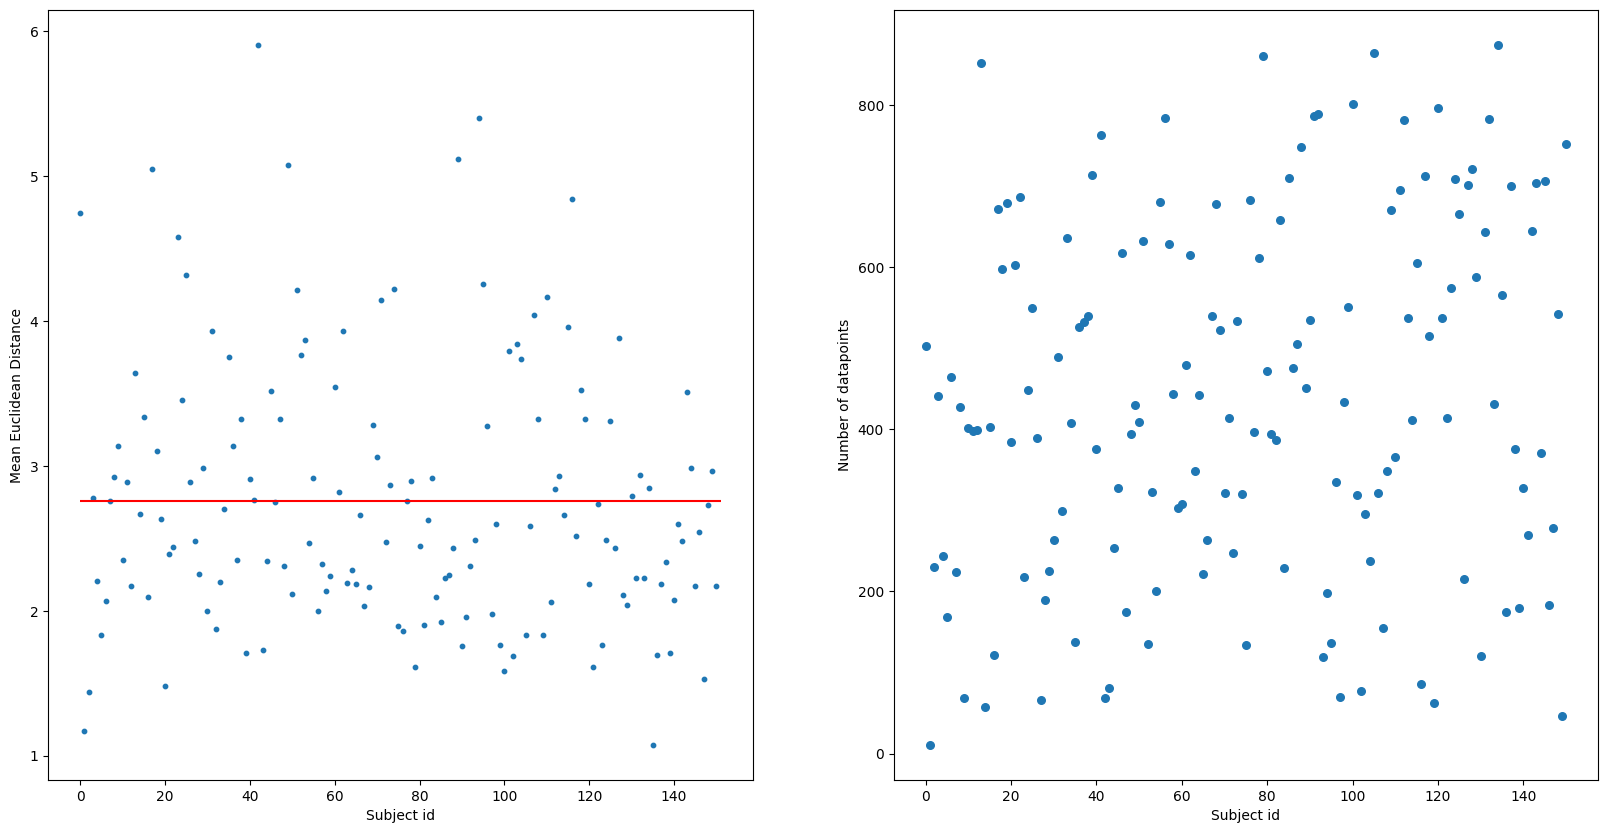

In [10]:
mean_errs = []
for i in total_test:
    mean_errs.append(np.mean(total_test[i][0]))
    
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter([i for i in range(len(mean_errs))], mean_errs, s=10)
plt.hlines(y=np.mean(mean_errs), xmin=0, xmax=len(mean_errs), color='r')
plt.xlabel('Subject id')
plt.ylabel('Mean Euclidean Distance')
plt.subplot(1,2,2)
plt.scatter([i for i in range(len(mean_errs))], [len(total_test[i][0]) for i in total_test], s=30)
plt.xlabel('Subject id')
plt.ylabel('Number of datapoints')
np.mean(mean_errs)

In [11]:
np.std(mean_errs)/np.sqrt(len(mean_errs))

0.0731095140995987

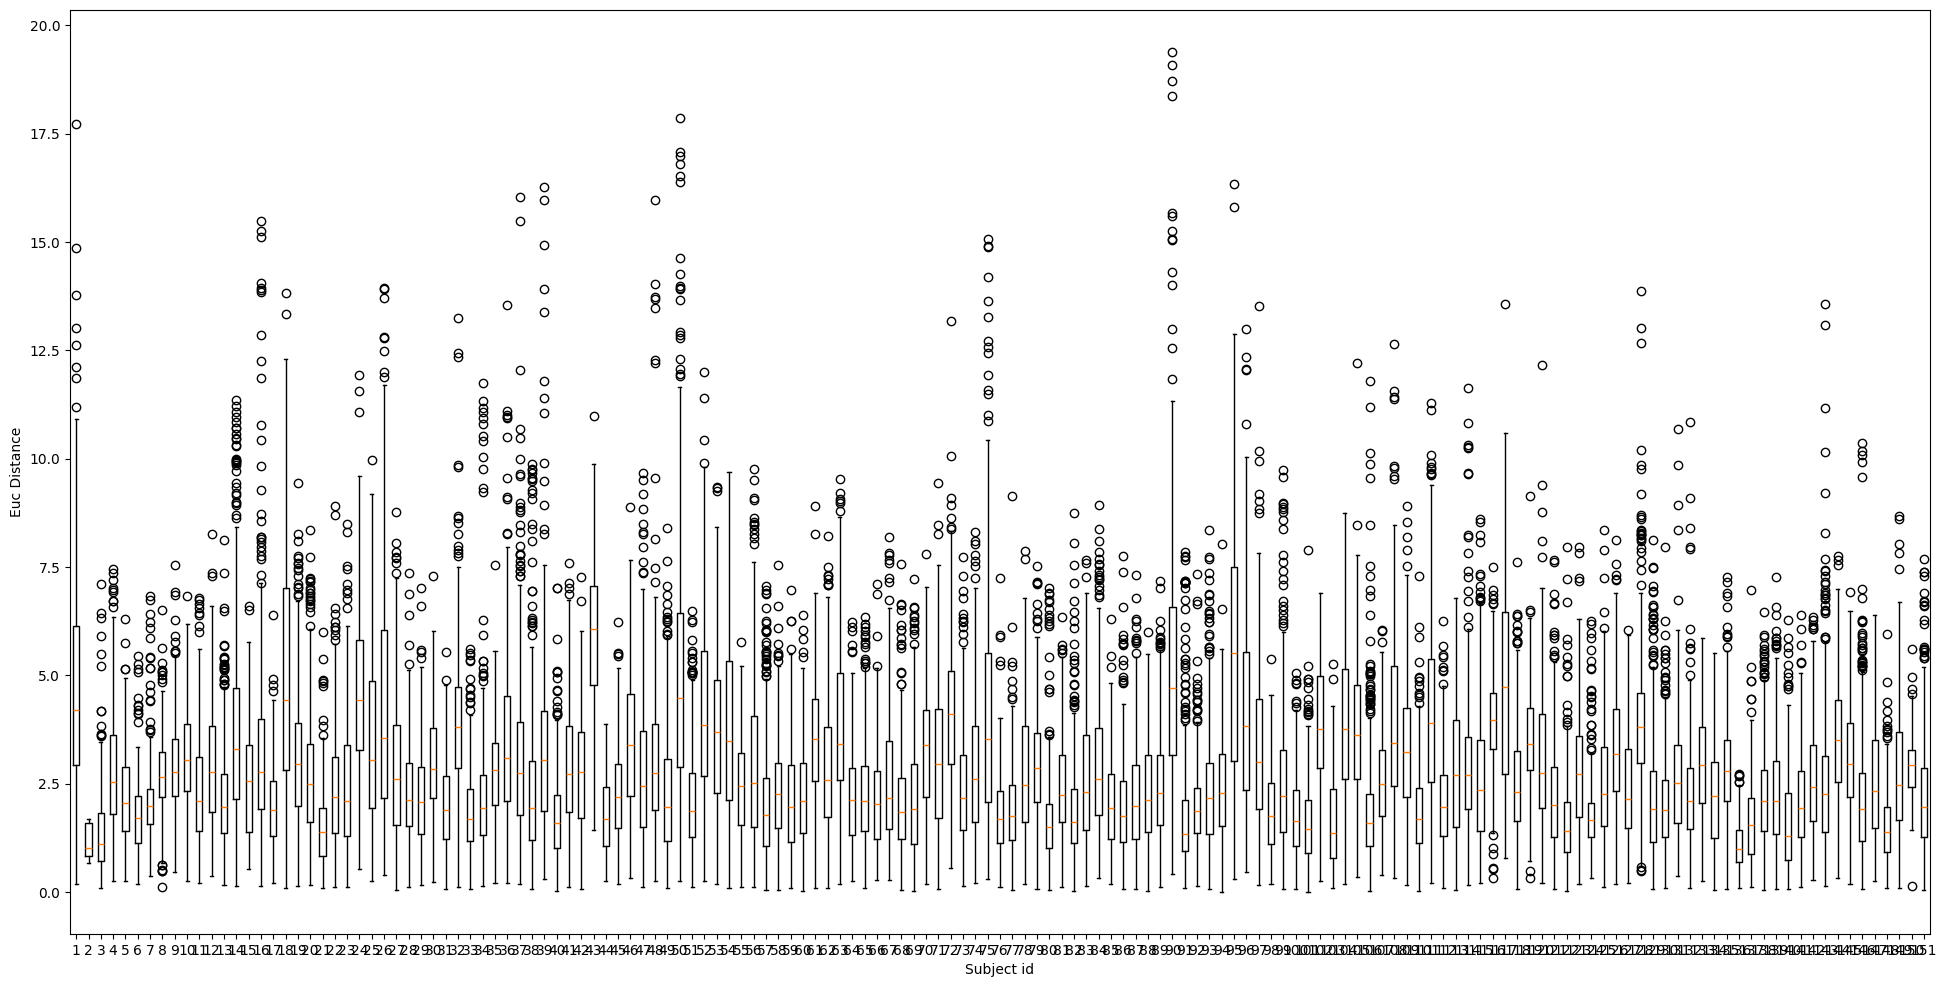

In [12]:
dists = [total_test[i][0] for i in total_test]
plt.figure(figsize=(24,12))
plt.boxplot(dists)
plt.xlabel('Subject id')
plt.ylabel('Euc Distance')
a=1

2.2741478

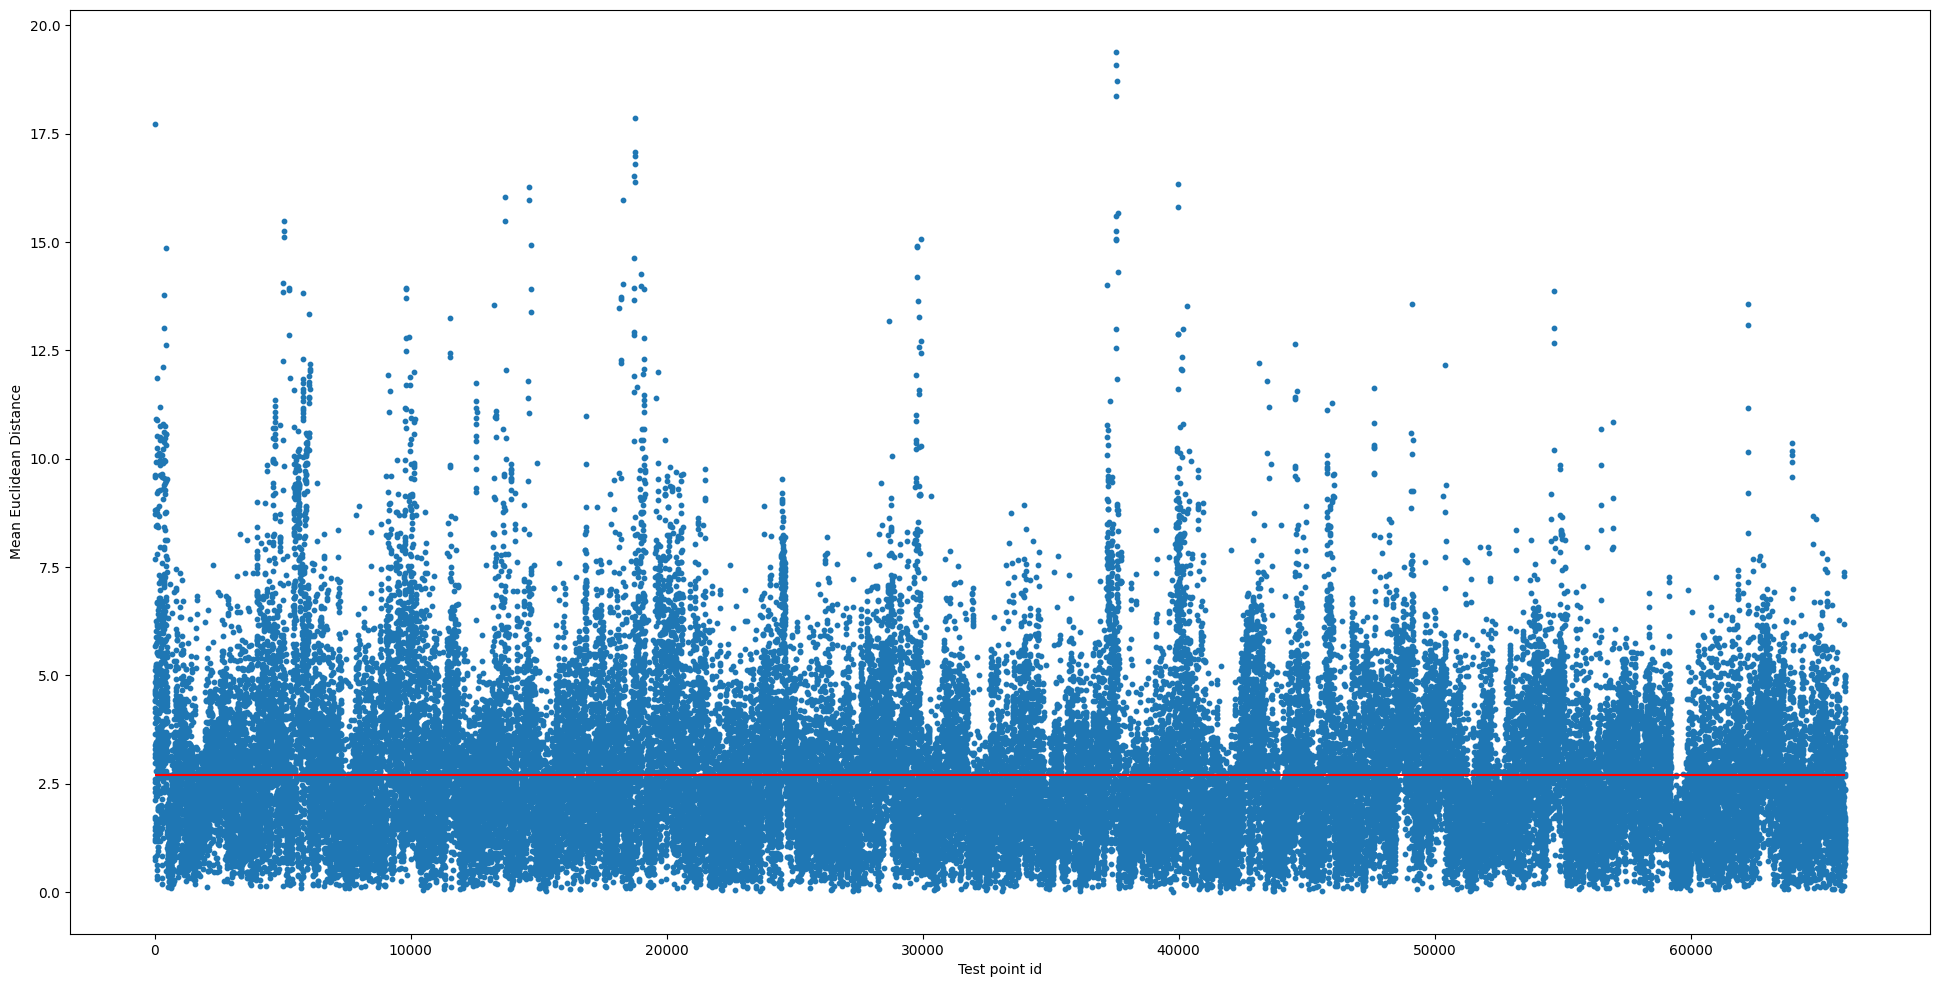

In [13]:
mean_errs = []
for i in total_test:
    mean_errs.extend(total_test[i][0])
plt.figure(figsize=(24, 12))
plt.scatter([i for i in range(len(mean_errs))], mean_errs, s=10)
plt.hlines(y=np.mean(mean_errs), xmin=0, xmax=len(mean_errs), color='r')
plt.xlabel('Test point id')
plt.ylabel('Mean Euclidean Distance')
np.mean(mean_errs)

In [16]:
import colorsys
def get_colors(num_colors):
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

(-13.0, 0.2)

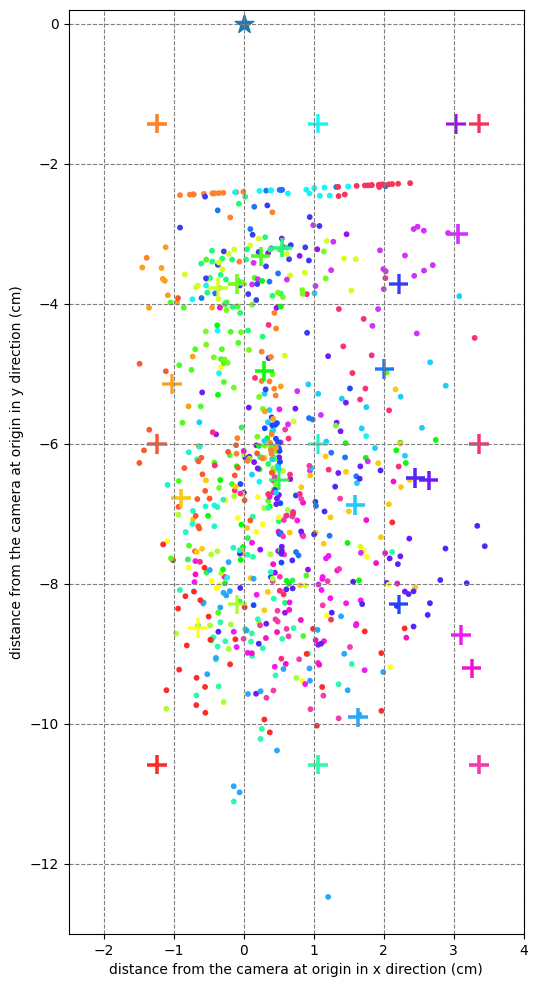

In [17]:
pts = np.unique(gt, axis=0)
c = get_colors(len(pts))
cols = np.zeros((len(gt),3))
for i in range(len(pts)):
    cols[np.where(np.all(gt==pts[i],axis=1))] = c[i]
    
plt.figure(figsize=(12,12))
plt.grid(color='gray', linestyle='dashed')
plt.scatter(0, 0, marker='*', s=200)
plt.scatter(preds[:,0], preds[:,1], c=cols, s=10)
plt.scatter(gt[:,0], gt[:,1], c=cols, marker='+', s=200)
plt.xlabel('distance from the camera at origin in x direction (cm)')
plt.ylabel('distance from the camera at origin in y direction (cm)')
plt.axis('scaled')
plt.xlim(-2.5, 4)
plt.ylim(-13, 0.2)